# Climate Awareness Sonification

This script uses environmental- and climate awareness data from the German Federal Environment Agency and yearly averaged temperature data from Germany and turns them into MIDI files, to produce a sonified version of the data.

Instructions for sonification from [Matt Russo](https://medium.com/@astromattrusso/sonification-101-how-to-convert-data-into-music-with-python-71a6dd67751c)

Temperature Data: [DWD](https://www.dwd.de/DE/leistungen/zeitreihen/zeitreihen.html#buehneTop)

Environmental Awareness Data was provided by Angelika Gellrich. It is abbreviated as UPB (meaning Umweltproblembewusstsein).

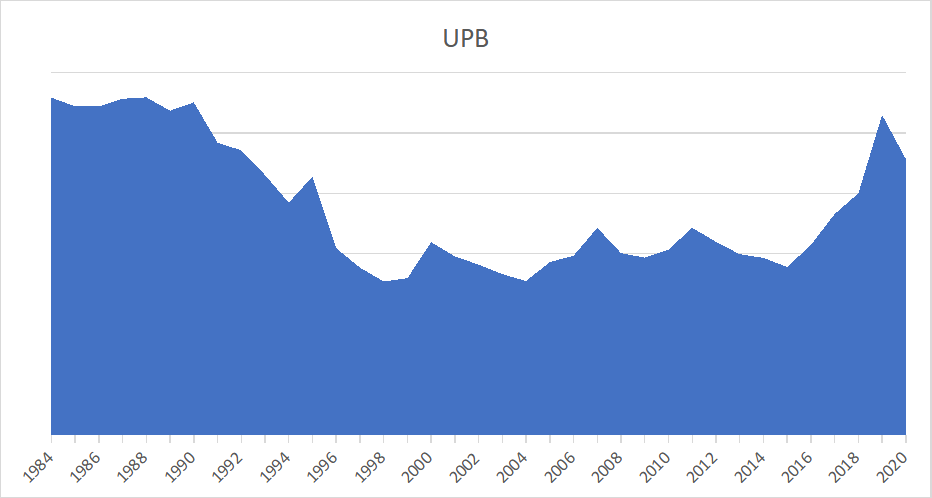

## Data Preparation

In [1]:
# Import all libraries
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.path as mpath
import matplotlib.ticker

In [3]:
#define path and import data
#path = 'C:/Users/F/Downloads/UPB_Zeitverlauf.xlsx'
path = "C:/Users/LENOVO/Desktop/Climate Communication/UPB_Zeitverlauf.xlsx"
df = pd.read_excel(path)

In [5]:
#We need to transorm the data in order to use is as we want it
df_transposed = df.transpose()
# Reset index and set "Year" and "UPB" as column headings
df_transposed = df_transposed.reset_index()
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed.drop(0).reset_index(drop=True)
df = df_transposed

In [6]:
#we add the yearly average temperature
df["Jahresdurchschnittstemperatur"] =[8.0, 7.4, 7.9, 7.4, 9.1, 9.5, 9.5, 8.3, 9.4, 8.5, 9.7, 8.9, 7.2, 8.9, 9.1, 9.5, 9.9, 
                                      9.0, 9.6, 9.4, 8.9, 9.0, 9.5, 9.9, 9.5, 9.2, 7.8, 9.6, 9.1, 8.7, 10.3, 9.9, 9.5, 9.6,10.5, 10.3, 10.4] 

Text(0, 0.5, 'Temperature')

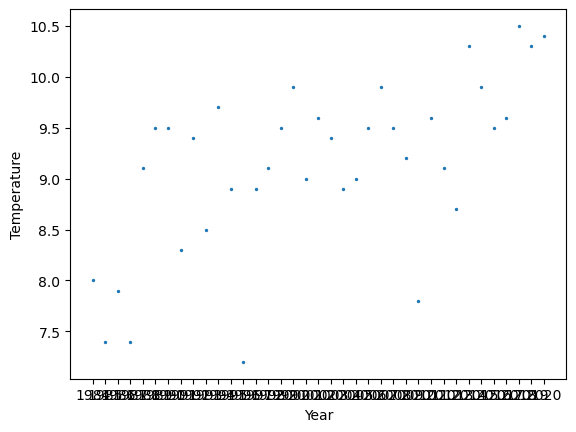

In [8]:
#read in the data and plot for example temperature (plot can be skiped)
year = df['Jahr']
UPB = df['UPB']
temp = df["Jahresdurchschnittstemperatur"]
#xlabs = [str(df["Jahr"][x]) for x in range(len(df['Jahr']))]  # remove for readable year on x-axis

plt.scatter(year, temp, s = 2)
plt.xlabel('Year')
plt.ylabel('Temperature')
#plt.xticks(xlabs,fontsize=6, rotation=90)  # remove for readable year on x-axis

## Mapping


Now we map the data values to musical parameter. so for example awareness values to volume/velocity.

Mapping a set of numbers from one range to another is so common in sonification so we write a function that does just that for us. The following function will map input values (as an integer, float, or array) taken from one range, min_value to max_value, into a new range, min_result to max_result:

In [9]:
def map_value(value, min_value, max_value, min_result, max_result):
 #maps value (or array of values) from one range to another
 
 result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
 return (result) #rounding to an integer is optional, dependng on what we want to do 

Let's now normalize the data for the compounds. That mean, we map the whole range of data to from 0 to 1 with our function.

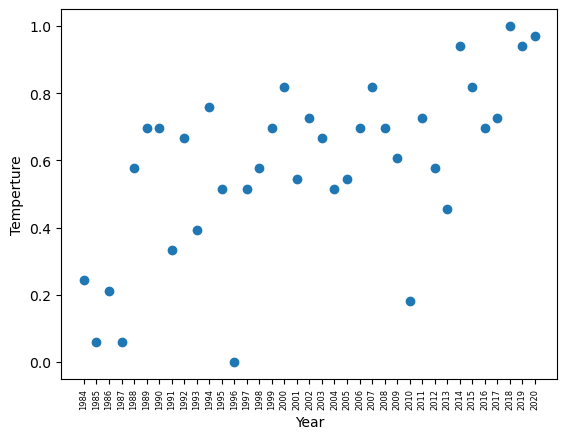

In [13]:
#Normalized Temperature
ntemp = map_value(temp, min(temp), max(temp), 0,1)

#Optional Plot
plt.scatter(year, ntemp)
plt.xlabel('Year')
plt.ylabel('Temperture')
tks = plt.xticks(fontsize=6, rotation=90)

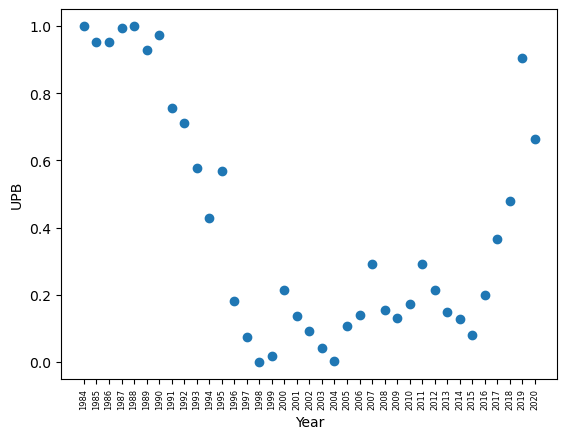

In [14]:
#Normalized Awareness
nUPB = map_value(UPB, min(UPB), max(UPB), 0,1)

#Optional Plot
plt.scatter(year, nUPB)
plt.xlabel('Year')
plt.ylabel('UPB')
tks = plt.xticks(fontsize=6, rotation=90)

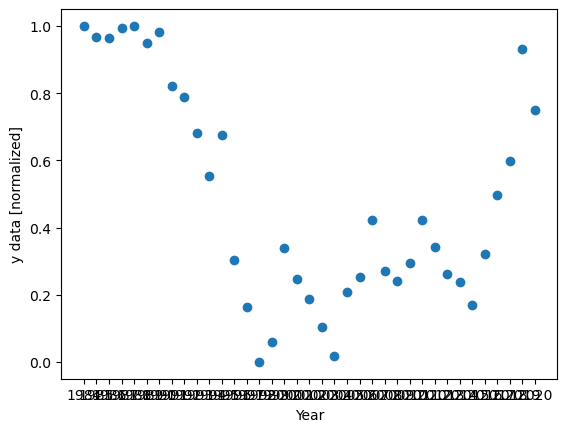

In [9]:
# non-linear scaling to spread them differently if we want
#we might want this so that not a lot of values have the same note or volume, but to spread them more
#making the sound more diverse and values distinguishable
y_scale = 0.7  #lower than 1 to spread out more evenly, usually 0.5 for sqrt 
n = nUPB**y_scale
plt.scatter(year, n)
plt.xlabel('Year')
plt.ylabel('y data [normalized]')
tks = plt.xticks(fontsize=6, rotation=90)
plt.show()

## Mapping Data to Musical Notes
Each musical note (all of the notes on a piano plus more) corresponds to a certain MIDI note number which is an integer from 0–127. MIDI is a file format that is used to make sound. We can later export our data as a MIDI file and import it into a digital audio workstation like Ableton, to mix a final track with different single tracks or use different "instruments"/sounds.

In [7]:
#from audiolazy import str2midi, midi2str #try this if the last line does not work
from collections.abc import Mapping
from collections.abc import MutableMapping
from collections.abc import Sequence
from audiolazy_functions import str2midi, midi2str

The next step is to chose a key and a scale. e.g. typical major scale, pentatonic scale (to be more safe). 
We’re going to use a C major/A minor key as a pentatonic scale from A2 to E5.

Here, we do some calculations and try different scales for the temperature data, to present the temperature steps more accurately.

In [8]:
#how many tones would be needed for a semitone/whole tone for a half degree/whole degree gradient
unterteilung= 1/2
numberoftones = (((max(df['Jahresdurchschnittstemperatur']) - min(df['Jahresdurchschnittstemperatur'])) / unterteilung) + 
                 unterteilung - ((max(df['Jahresdurchschnittstemperatur']) - min(df['Jahresdurchschnittstemperatur'])) / unterteilung) % unterteilung) / unterteilung
print(numberoftones) 

14.0


In [15]:
#how many tones would be needed for a semitone/whole tone for a half degree/whole degree gradient
unterteilung= 0.5
numberoftones = (((max(UPB) - min(UPB)) / unterteilung) + 
                 unterteilung - ((max(UPB) - min(UPB)) / unterteilung) % unterteilung) / unterteilung
print(numberoftones) 

2.0


In [10]:
# here we define different scales for the notes, that we will use later for awareness and temperature
note_names = ['C3','E3','G3','A3','B3',
             'C4','D4','E4','G4','A4','B4',
             'D5']


c_harmonisch14 = ['C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3','C4','D4', 'E4', 'F4', 'G4', 'A4', 'B4' ]

c_major_quad = ['C3', 'E3', 'G3', 'B3']
c_quints = ['C3', 'G3', 'D4', 'A4']
a_pentatonic = ['A2', 'C3', 'D3', 'E3', 'G3', 'A3', 'C4', 'D4', 'E4', 'G4', 'A4', 'C5', 'D5', 'E5']
c_const = ['C4']

Once we’ve chosen our note set, we make a list of the corresponding midi note numbers. We will also define a variable n_notes to store the number of notes we will map data to.

In [16]:
note_midis = [str2midi(n) for n in a_pentatonic] 
note_midis = [str2midi(n) for n in c_const] 
n_notes = len(note_midis)

We can then use our map_value function to map our data, which currently runs from 0 to 1, into a new range, n_notes-1 to 0. The result will be a list index.

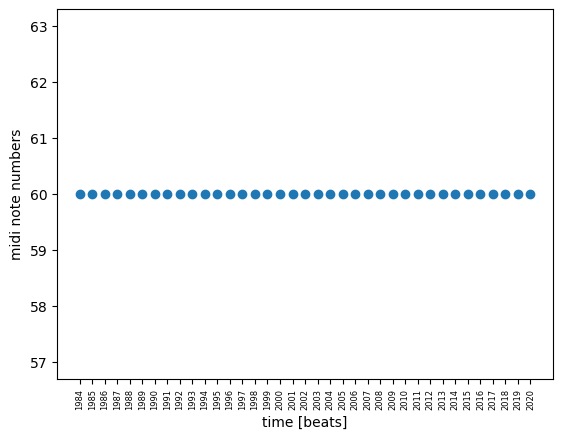

In [17]:
#we we do that for the Awareness Data, the note will be a single C4 note
sourcedata = nUPB
midi_data = []
for i in range(len(sourcedata)):
    note_index = round(map_value(sourcedata.iloc[i], 0, 1, 0,n_notes-1)) 
    midi_data.append(note_midis[note_index])

#Optional Plot
plt.scatter(year, midi_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
tks = plt.xticks(fontsize=6, rotation=90)

The awareness will be represented by the note's velocity, a combination of speed or length and volume of the note, instead of a melody. (We will edit the notes later in Ableton, so that the notes lengths are all equal, but we kept the volume differences)

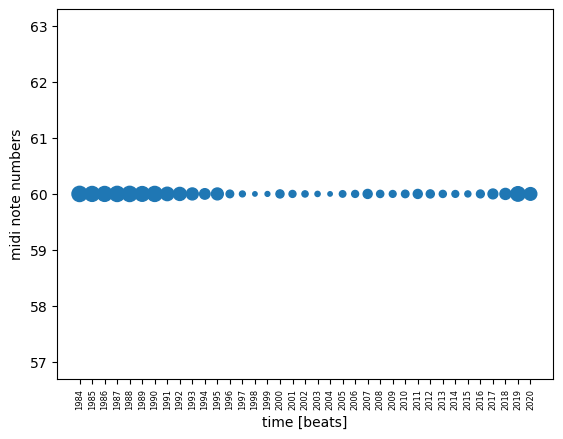

In [18]:
vel_min,vel_max = 10,120   #minimum and maximum note velocity
vel_data = []
vel_data_const = []
for i in range(len(nUPB)):
    note_velocity = round(map_value(nUPB[i],0,1,vel_min, vel_max)) 
    vel_data.append(note_velocity)
    vel_data_const.append(70)
    
plt.scatter(year, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
tks = plt.xticks(fontsize=6, rotation=90)

plt.show()

## Writing a MIDI File
We need to create a new MIDIFile object, set the tempo, and then add the notes one at a time. For each note we can specify the track, channel, time (measured in beats), pitch (midi note number), volume (velocity), and duration (measured in beats). We’ll just set all of the note durations to 2 beats but you could use data to control this too.

In [21]:
duration_beats = len(year)  #desired duration in beats (actually, onset of last note)
t_data = map_value(np.array(year_int), min(year_int), max(year_int), 0,duration_beats)

In [22]:
#this code creates and saves our MIDI file, here for the awareness
from midiutil import MIDIFile 
filename = "UBP_c_const_10"
#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track 
my_midi_file.addTempo(track=0, time=0, tempo= 60) #add midi notes
# convert year into time steps / beats
for i in range(len(year)):
    my_midi_file.addNote(track=0, channel=0, time=t_data[i], pitch=midi_data[i], volume=vel_data[i], duration=2)
    #create and save the midi file itself
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)